In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import func

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
#Column info of Measurement
inspector = inspect(engine)
#inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Select and display the first 10 rows of Measurement
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
#Column info of Station
inspector = inspect(engine)
#inspector.get_table_names()
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Select and display the first 10 rows of Station

engine.execute('SELECT * FROM station LIMIT 10').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the data
# Calculate the date 1 year ago from the last data point in the database
#session = Session(engine)
ppt_12mo = pd.read_sql("SELECT id, date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23';", conn)
#ppt_12mo.tail()
#full_dataset_Df =pd.read_sql("SELECT * from measurement m LEFT JOIN station s on s.id = m.id",conn)
#full_dataset_Df.head(12)


In [15]:
#measurement_df = pd.read_sql("Select * from measurement",conn)
#measurement_df.head()

# Perform a query to retrieve the data and precipitation scores
#OR variable to calculate ((variable last date) - (365 days)) - use datetime
prcp_1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
#prcp_1
prcp_df = pd.DataFrame(prcp_1,columns=["date","precipitation"])
prcp_df.dropna(how='any', inplace=True)
prcp_df.set_index('date', inplace=True, drop=True)
prcp_df.sort_values(by='date') 
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#session = Session(engine)
#ppt_12mo = pd.read_sql("SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23';", conn)
#ppt_12mo.dropna(how='any', inplace=True)
#ppt_12mo.set_index('date', inplace=True, drop=True)
#ppt_12mo.sort_values(by='date') 
##ppt_12mo.set_index('date')
#ppt_12mo.head()

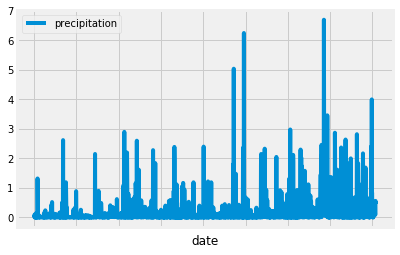

In [17]:
prcp_df.plot()
plt.show()

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
#x=prcp_df.index
#y = prcp_df.prcp
#fig = plt.figure()
#plt.figure(figsize=(10,5))
#plt.bar(x,y, label="Precipitation")
#plt.legend()
#plt.grid(True)
#plt.ylabel("inches")
#plt.xlabel("date")
#plt.title("Preciptation in Honolulu, Hawaii from August 2016 - August 2017")
#plt.show

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Method 1: Design a query to show how many stations are available in this dataset?
all_data = pd.read_sql("SELECT * FROM station", conn)
all_data.station.count()

9

In [21]:
# Method 2: Design a query to show how many stations are available in this dataset?
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station
session = Session(engine)
#results = session.query(Station.station).count()
results = session.query(func.count(Station.station)).all()
results

[(9)]

[(9)]

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#Approach 1
#Measurement = Base.classes.measurement
#station_counts = session.query(Measurement.station).order_by(Measurement.station.desc()).all()
#station_counts

In [23]:
#measurements = session.query(Measurement)

#Approach 2
#for x in measurements:
# print(x.station)

#Approach 3
#session.query(Measurement).\
#    filter(Measurement.station).count()

#THE SQL I WANT
#SELECT station,COUNT(*)
#FROM measurement      
#GROUP BY station;

#measurements1 = session.query(Measurement.station).group_by(Measurement.station).count()
#print(measurements1)

#station_count = pd.read_sql("SELECT station, count(*) FROM measurement GROUP BY station ORDER BY count(*) DESC", conn)
#station_count

In [24]:
station_count2 = session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temperatures_q = session.query(func.min(Measurement.tobs),#.label("min_score"),
                               func.max(Measurement.tobs),#.label("max_score"),
                func.avg(Measurement.tobs),#.label("avg_score")
                ).filter_by(station = "USC00519281").all()
#res = temperatures_q.one()
#max = res.max_score
#min = res.min_score
#avg = res.avg_score
#res 
temperatures_q

[(54.0, 85.0, 71.66378066378067)]

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session = Session(engine)
highstation_temp_date = session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date.between('2016-08-18', '2017-08-18')).all()
highstation_temp_date
#ppt_12mo = pd.read_sql("SELECT date, tobs, station FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23';", conn)
#ppt_12mo.dropna(how='any', inplace=True)
#ppt_12mo.set_index('date', inplace=True, drop=True)
##ppt_12mo.sort_values(by='date') 
#ppt_12mo.set_index('date')
#ppt_12mo.head()

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [27]:
# Unpack and save into separate lists
highstation_temp = [int(result[1]) for result in highstation_temp_date]

<function matplotlib.pyplot.show(*args, **kw)>

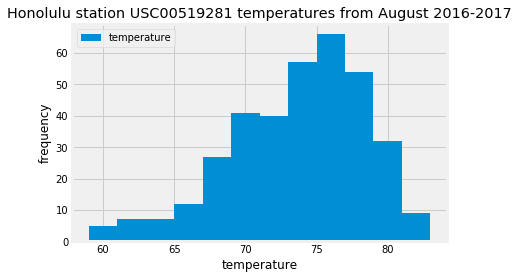

In [28]:
#PLot
plt.hist(highstation_temp, bins=12, label="temperature")
plt.legend()
#plt.grid(True)
plt.ylabel("frequency")
plt.xlabel("temperature")
plt.title("Honolulu station USC00519281 temperatures from August 2016-2017")
plt.show
# Save the figure and show
#plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
#plt.show()

![precipitation](Images/station-histogram.png)

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
tripduration = calc_temps('2012-02-28', '2012-03-05')


[(62.0, 69.57142857142857, 74.0)]


In [30]:
tmin, tmax, tavg = calc_temps('2012-02-28', '2012-03-05')[0]
print(tmin, tmax, tavg)

62.0 69.57142857142857 74.0


In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
#tripavg = [int(result[1]) for result in tripduration]
#tripavg
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#y_yerr_tmin1 = [int(result[0]) for result in tripduration]
#y_yerr_tmax2 = [int(result[2]) for result in tripduration]
#y_yerr_value_both = y_yerr_tmax2 + y_yerr_tmin1
#y_yerr_value_both
#y_yerr_tmax2

NameError: name 'materials' is not defined

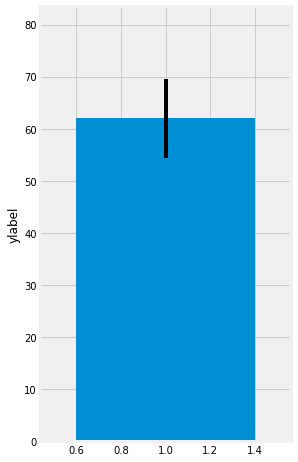

In [32]:
x_pos = 1
#x_pos = np.arange(len(tripduration))
error = (tmax-tmin) 
#error2=[[tripduration[0]],[tripduration[1]]]

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
ax.bar(x_pos,tmin, yerr=error)#, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('ylabel')
#ax.set_xticks(x_pos)
ax.margins(.2,.2)
ax.set_xticklabels(materials)
ax.set_title('title')
ax.yaxis.grid(True)

# Save the figure and show
#plt.savefig('bar_plot_with_error_bars.png')
fig.tight_layout()
fig.show()

In [ ]:
# Calculate the rainfall per weather station for your trip dates using 
#the previous year's matching dates.
# Sort this in descending order by precipitation 
#amount and list the station, name, latitude, longitude, and elevation
start_date = '2012-01-01'
end_date = '2012-01-07'
rainfall_per_station = session.query(Station.station,Station.name,
                                     Station.latitude, Station.longitude,
                                     Station.elevation,func.sum(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date)\
    .group_by(Station.name).\
    order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_per_station

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]


In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
prcp_df2 = prcp_df.reset_index()
prcp_df2.columns = ['date', 'prcp']
prcp_df2.head()

In [ ]:
#abc = prcp_df2.to_dict('split')
#abc = prcp_df2.to_dict()
abc = prcp_df2.set_index('date')['prcp'].to_dict()
abc

In [ ]:
#all_data_station_list = []
dfToList = all_data['station'].tolist()
dfToList
#dfList = list(df['one'])

#dfValues = df['one'].values

In [34]:
#tmin, tmax, tavg = calc_temps('2012-02-28', '2012-03-05')[0]
import datetime
end = datetime.datetime(2012 , 3, 5)
start = datetime.datetime(2012 ,2, 28)
range_fulldates = session.query(Measurement.date, func.avg(Measurement.tobs), func.min(Measurement.tobs),
                                func.max(Measurement.tobs)).filter(Measurement.date >= start).group_by(Measurement.date).all()
range_fulldates





[('2012-02-29', 72.11111111111111, 69.0, 74.0),
 ('2012-03-01', 71.11111111111111, 67.0, 74.0),
 ('2012-03-02', 69.25, 66.0, 74.0),
 ('2012-03-03', 69.71428571428571, 65.0, 73.0),
 ('2012-03-04', 68.85714285714286, 65.0, 73.0),
 ('2012-03-05', 65.0, 62.0, 67.0),
 ('2012-03-06', 67.71428571428571, 66.0, 70.0),
 ('2012-03-07', 66.57142857142857, 65.0, 69.0),
 ('2012-03-08', 67.28571428571429, 66.0, 69.0),
 ('2012-03-09', 65.0, 61.0, 68.0),
 ('2012-03-10', 72.28571428571429, 70.0, 75.0),
 ('2012-03-11', 72.85714285714286, 70.0, 75.0),
 ('2012-03-12', 69.28571428571429, 67.0, 71.0),
 ('2012-03-13', 68.42857142857143, 65.0, 72.0),
 ('2012-03-14', 69.14285714285714, 65.0, 73.0),
 ('2012-03-15', 68.28571428571429, 66.0, 71.0),
 ('2012-03-16', 69.57142857142857, 66.0, 72.0),
 ('2012-03-17', 73.0, 68.0, 75.0),
 ('2012-03-18', 69.16666666666667, 66.0, 72.0),
 ('2012-03-19', 70.28571428571429, 65.0, 73.0),
 ('2012-03-20', 66.875, 63.0, 72.0),
 ('2012-03-21', 69.14285714285714, 65.0, 73.0),
 ('201

In [36]:
end = datetime.datetime(2012, 3, 5)
start = datetime.datetime(2012, 2, 28)
range_vacationdates = session.query(Measurement.date, func.avg(Measurement.tobs), func.min(Measurement.tobs),
                                    func.max(Measurement.tobs)).filter(Measurement.date.between(start, end)).group_by(Measurement.date).all()
range_vacationdates
    
    
    

[('2012-02-29', 72.11111111111111, 69.0, 74.0),
 ('2012-03-01', 71.11111111111111, 67.0, 74.0),
 ('2012-03-02', 69.25, 66.0, 74.0),
 ('2012-03-03', 69.71428571428571, 65.0, 73.0),
 ('2012-03-04', 68.85714285714286, 65.0, 73.0),
 ('2012-03-05', 65.0, 62.0, 67.0)]